In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Cleaning Part 1

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
pd.options.mode.chained_assignment = None

In [3]:
# Load column decriptions
# there is an excess \t in line 67, which had to be first deleted to avoid the error
col_descriptions = pd.read_csv('data/data_dictionary.tsv', sep='\t')
#col_description.drop(columns=['field_location', 'data_type', 'allowable_enumerations_baseline'])

In [4]:
col_descriptions['data_type'][col_descriptions['data_type']=='integer'] = 'int'
dtypes = {col: dtype for col, dtype in zip(col_descriptions['field_name'], col_descriptions['data_type'])}

In [5]:
df = pd.read_csv('data/baseline_metadata_and_annual_results.csv', dtype=dtypes) # specify correct data types
df.head(2)

,bldg_id,upgrade,weight,applicability,in.sqft,in.ahs_region,in.ashrae_iecc_climate_zone_2004,in.ashrae_iecc_climate_zone_2004_2_a_split,in.bathroom_spot_vent_hour,in.bedrooms,in.building_america_climate_zone,in.cec_climate_zone,in.ceiling_fan,in.census_division,in.census_division_recs,in.census_region,in.city,in.clothes_dryer,in.clothes_washer,in.clothes_washer_presence,in.cooking_range,in.cooling_setpoint,in.cooling_setpoint_has_offset,in.cooling_setpoint_offset_magnitude,in.cooling_setpoint_offset_period,in.corridor,in.county,in.county_and_puma,in.dehumidifier,in.dishwasher,in.door_area,in.doors,in.ducts,in.eaves,in.electric_vehicle,in.emissions_electricity_folders,in.emissions_electricity_units,in.emissions_electricity_values_or_filepaths,in.emissions_fossil_fuel_units,in.emissions_fuel_oil_values,in.emissions_natural_gas_values,in.emissions_propane_values,in.emissions_scenario_names,in.emissions_types,in.emissions_wood_values,in.federal_poverty_level,in.generation_and_emissions_assessment_region,in.geometry_attic_type,in.geometry_building_horizontal_location_mf,in.geometry_building_horizontal_location_sfa,in.geometry_building_level_mf,in.geometry_building_number_units_mf,in.geometry_building_number_units_sfa,in.geometry_building_type_acs,in.geometry_building_type_height,in.geometry_building_type_recs,in.geometry_floor_area,in.geometry_floor_area_bin,in.geometry_foundation_type,in.geometry_garage,in.geometry_stories,in.geometry_stories_low_rise,in.geometry_story_bin,in.geometry_wall_exterior_finish,in.geometry_wall_type,in.has_pv,in.heating_fuel,in.heating_setpoint,in.heating_setpoint_has_offset,in.heating_setpoint_offset_magnitude,in.heating_setpoint_offset_period,in.holiday_lighting,in.hot_water_distribution,in.hot_water_fixtures,in.hvac_cooling_efficiency,in.hvac_cooling_partial_space_conditioning,in.hvac_cooling_type,in.hvac_has_ducts,in.hvac_has_shared_system,in.hvac_has_zonal_electric_heating,in.hvac_heating_efficiency,in.hvac_heating_type,in.hvac_heating_type_and_fuel,in.hvac_secondary_heating_efficiency,in.hvac_secondary_heating_type_and_fuel,in.hvac_shared_efficiencies,in.hvac_system_is_faulted,in.hvac_system_single_speed_ac_airflow,in.hvac_system_single_speed_ac_charge,in.hvac_system_single_speed_ashp_airflow,in.hvac_system_single_speed_ashp_charge,in.income,in.income_recs_2015,in.income_recs_2020,in.infiltration,in.insulation_ceiling,in.insulation_floor,in.insulation_foundation_wall,in.insulation_rim_joist,in.insulation_roof,in.insulation_slab,in.insulation_wall,in.interior_shading,in.iso_rto_region,in.lighting,in.lighting_interior_use,in.lighting_other_use,in.location_region,in.mechanical_ventilation,in.misc_extra_refrigerator,in.misc_freezer,in.misc_gas_fireplace,in.misc_gas_grill,in.misc_gas_lighting,in.misc_hot_tub_spa,in.misc_pool,in.misc_pool_heater,in.misc_pool_pump,in.misc_well_pump,in.natural_ventilation,in.neighbors,in.occupants,in.orientation,in.overhangs,in.plug_load_diversity,in.plug_loads,in.puma,in.puma_metro_status,in.pv_orientation,in.pv_system_size,in.radiant_barrier,in.range_spot_vent_hour,in.reeds_balancing_area,in.refrigerator,in.roof_material,in.schedules,in.simulation_control_run_period_begin_day_of_month,in.simulation_control_run_period_begin_month,in.simulation_control_run_period_calendar_year,in.simulation_control_run_period_end_day_of_month,in.simulation_control_run_period_end_month,in.simulation_control_timestep,in.solar_hot_water,in.state,in.tenure,in.units_represented,in.usage_level,in.vacancy_status,in.vintage,in.vintage_acs,in.water_heater_efficiency,in.water_heater_fuel,in.water_heater_in_unit,in.weather_file_city,in.weather_file_latitude,in.weather_file_longitude,in.window_areas,in.windows,out.electricity.ceiling_fan.energy_consumption.kwh,out.electricity.clothes_dryer.energy_consumption.kwh,out.electricity.clothes_washer.energy_consumption.kwh,out.electricity.cooling_fans_pumps.energy_consumption.kwh,out.electricity.cooling.energy_consumption.kwh,out.electricity.dishwasher.energ

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548916 entries, 0 to 548915
Columns: 227 entries, bldg_id to out.emissions.all_fuels.lrmer_mid_case_15_2025_start.co2e_kg
dtypes: bool(1), float64(80), int32(3), int64(2), string(141)
memory usage: 940.7 MB


In [7]:
# Get unique value counts by column
df_unique = df.apply(pd.unique, axis=0)
df_unique_counts = [len(u) for u in df_unique]
no_inf_cols = [col for col, count in zip(df_unique.index, df_unique_counts) if count==1]
no_inf_cols.append('bldg_id')
print('No information in', len(no_inf_cols), 'columns')
df = df.drop(columns=no_inf_cols) # drop columns without information (i.e., with 1 unique value)

No information in 45 columns


In [8]:
# Let's look at potential responses
out_cols = [col for col in df.columns if 'out' in col]
out_cols

['out.electricity.ceiling_fan.energy_consumption.kwh',
 'out.electricity.clothes_dryer.energy_consumption.kwh',
 'out.electricity.clothes_washer.energy_consumption.kwh',
 'out.electricity.cooling_fans_pumps.energy_consumption.kwh',
 'out.electricity.cooling.energy_consumption.kwh',
 'out.electricity.dishwasher.energy_consumption.kwh',
 'out.electricity.freezer.energy_consumption.kwh',
 'out.electricity.heating_fans_pumps.energy_consumption.kwh',
 'out.electricity.heating_hp_bkup.energy_consumption.kwh',
 'out.electricity.heating.energy_consumption.kwh',
 'out.electricity.hot_tub_heater.energy_consumption.kwh',
 'out.electricity.hot_tub_pump.energy_consumption.kwh',
 'out.electricity.hot_water.energy_consumption.kwh',
 'out.electricity.lighting_exterior.energy_consumption.kwh',
 'out.electricity.lighting_garage.energy_consumption.kwh',
 'out.electricity.lighting_interior.energy_consumption.kwh',
 'out.electricity.mech_vent.energy_consumption.kwh',
 'out.electricity.plug_loads.energy_con

In [9]:
consumption_categories = dict(df[out_cols].mean()[:-27])
consumption_categories = {k[4:-23]: v for k, v in sorted(consumption_categories.items(), key=lambda item: item[1], reverse=True)}
#consumption_categories = {k: v for k, v in sorted(consumption_categories.items(), key=lambda item: item[0])}

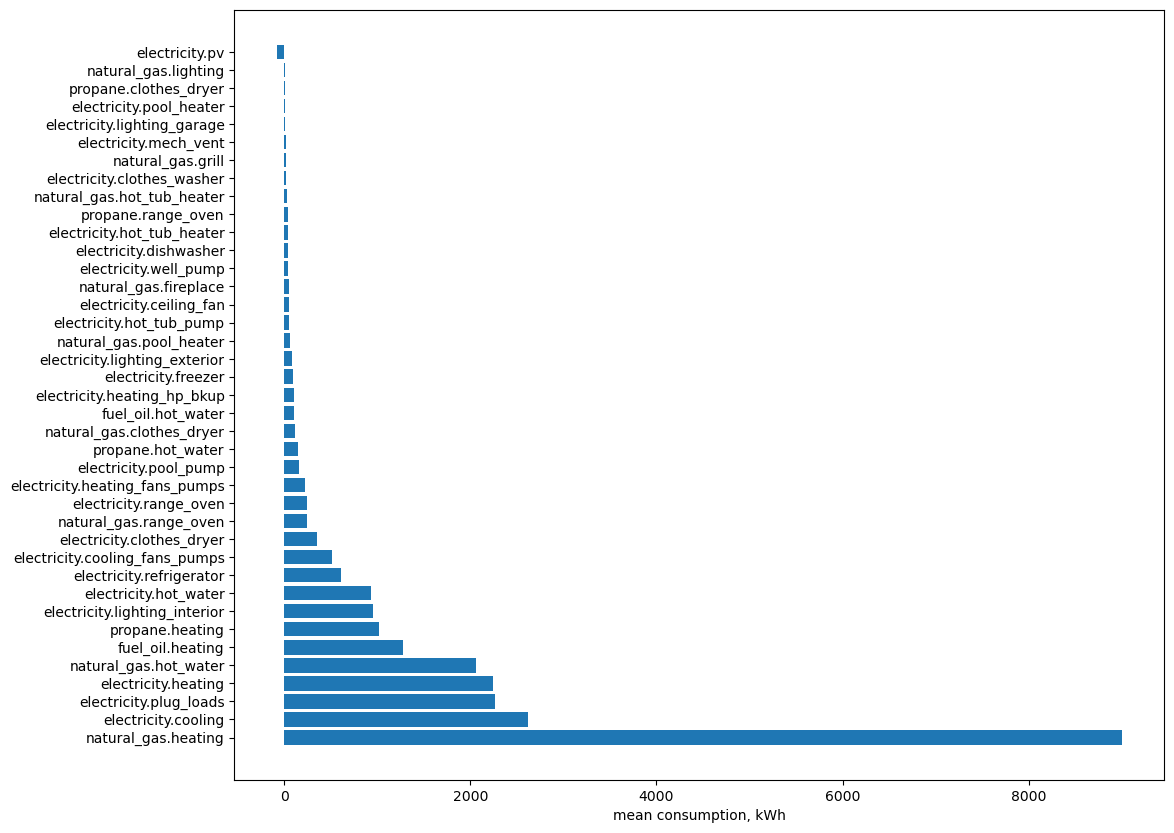

In [10]:
plt.figure(figsize=(12,10))
plt.barh(list(consumption_categories.keys()), list(consumption_categories.values()))
plt.xlabel('mean consumption, kWh');

In [11]:
# Define top consumption categories
heating = ['out.electricity.heating.energy_consumption.kwh', 'out.fuel_oil.heating.energy_consumption.kwh',
           'out.natural_gas.heating.energy_consumption.kwh', 'out.propane.heating.energy_consumption.kwh']
cooling = ['out.electricity.cooling.energy_consumption.kwh']
plug_loads = ['out.electricity.plug_loads.energy_consumption.kwh']
hot_water = ['out.electricity.hot_water.energy_consumption.kwh', 'out.fuel_oil.hot_water.energy_consumption.kwh',
             'out.natural_gas.hot_water.energy_consumption.kwh', 'out.propane.hot_water.energy_consumption.kwh']
lighting = ['out.electricity.lighting_exterior.energy_consumption.kwh', 'out.electricity.lighting_garage.energy_consumption.kwh',
            'out.electricity.lighting_interior.energy_consumption.kwh', 'out.natural_gas.lighting.energy_consumption.kwh']
top_categories = {'heating': heating, 'cooling': cooling, 'plug_loads': plug_loads, 'hot_water': hot_water, 'lighting': lighting}

In [12]:
emissions = dict(df[out_cols].mean()[-20:])
emissions = {k[14:-8]: v for k, v in sorted(emissions.items(), key=lambda item: item[1], reverse=True)}

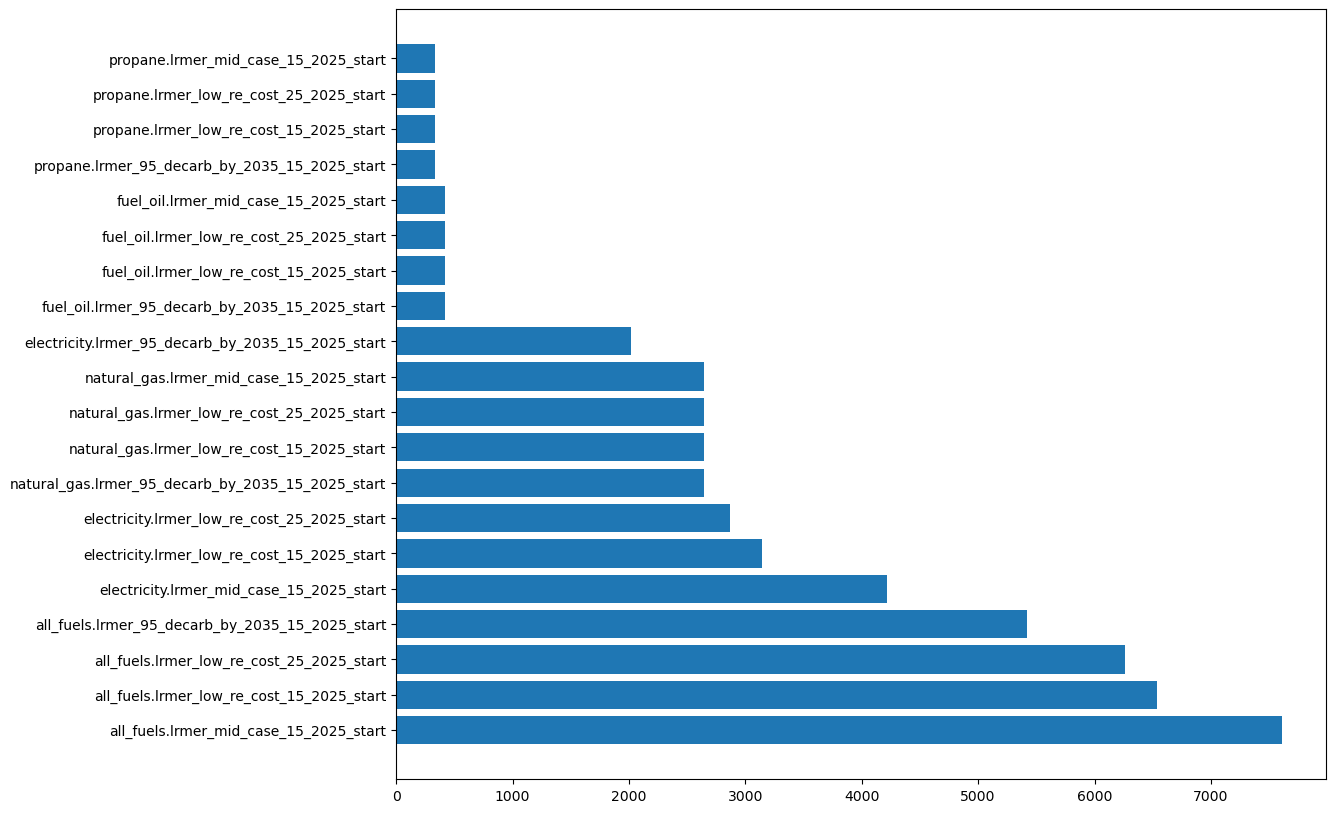

In [13]:
plt.figure(figsize=(12,10))
plt.barh(list(emissions.keys()), list(emissions.values()));

In [14]:
# Creating new data frame
# Including total consumptions only, i.e., removing the factor of out.electricity.pv.energy_consumption
#                                                                 (Energy produced by rooftop PV systems)
df_new = df[[#'out.site_energy.net.energy_consumption.kwh', 
              'out.site_energy.total.energy_consumption.kwh', 
              #'out.electricity.net.energy_consumption.kwh', 
              'out.electricity.total.energy_consumption.kwh', 
              'out.fuel_oil.total.energy_consumption.kwh', 
              'out.natural_gas.total.energy_consumption.kwh', 
              'out.propane.total.energy_consumption.kwh']]

In [15]:
for category, components in top_categories.items():
    new_name = 'out.' + category + '.energy_consumption.kwh'
    df_new[new_name] = df[components].sum(axis=1)

In [16]:
# Now let's identify unimportant columns
unimportant_cols = []
questionable_cols = [] # theoretically can be imporant but not sure (can be irrelavant or can be hard to work with)

In [17]:
in_cols = df.iloc[:, :116].dtypes
nonstr_in_cols = [i for i, dtype in zip(in_cols.index, in_cols) if dtype!='string']
print(nonstr_in_cols)

['in.sqft', 'in.bedrooms', 'in.geometry_stories', 'in.reeds_balancing_area', 'in.weather_file_latitude', 'in.weather_file_longitude']


In [18]:
df['in.sqft'] = df['in.sqft'].astype(int) # since all values are floats with .0

In [19]:
unimportant_cols.append('in.reeds_balancing_area') # not relevant to energy consumption
unimportant_cols.extend(['in.weather_file_latitude', 'in.weather_file_longitude'])
# ^ not relevant since essentially duplicating information in 'in.weather_file_city'

In [20]:
str_in_cols = [i for i, dtype in zip(in_cols.index, in_cols) if dtype=='string']

In [21]:
(df[str_in_cols]=='None').sum(axis=0)

in.ahs_region                                         0
in.ashrae_iecc_climate_zone_2004                      0
in.ashrae_iecc_climate_zone_2004_2_a_split            0
in.bathroom_spot_vent_hour                            0
in.building_america_climate_zone                      0
in.cec_climate_zone                              491549
in.ceiling_fan                                   153695
in.census_division                                    0
in.census_division_recs                               0
in.census_region                                      0
in.city                                               0
in.clothes_dryer                                  93874
in.clothes_washer                                 84281
in.clothes_washer_presence                        84281
in.cooking_range                                   5877
in.cooling_setpoint                                   0
in.cooling_setpoint_has_offset                        0
in.cooling_setpoint_offset_magnitude            

In [22]:
df_str_in_unique = df[str_in_cols].apply(pd.unique, axis=0)
dic_str_in_unique = {k:v for k,v in zip(list(df_str_in_unique.index), [list(u) for u in df_str_in_unique])}
dic_str_in_unique = {k:v for k,v in sorted(dic_str_in_unique.items(), key=lambda item: len(item[1]), reverse=True)}
dic_str_in_unique_len = {k:len(v) for k,v in dic_str_in_unique.items()}

In [23]:
for k,v in dic_str_in_unique_len.items():
    if v>1000: print("'", k, "'", ': ', v, sep='')

'in.county_and_puma': 4502
'in.county': 3107
'in.puma': 2336
'in.city': 1101
'in.weather_file_city': 1027


In [24]:
unimportant_cols.extend(['in.county_and_puma', 'in.county', 'in.puma', 'in.city']) # not relevant to energy consumption

In [25]:
for k,v in dic_str_in_unique_len.items():
    if 20<=v<=1000: print("'", k, "'", ': ', v, sep='')

'in.cooling_setpoint_offset_period': 56
'in.state': 49
'in.heating_setpoint_offset_period': 34
'in.plug_loads': 32
'in.geometry_building_number_units_mf': 28
'in.ahs_region': 24
'in.bathroom_spot_vent_hour': 24
'in.range_spot_vent_hour': 24
'in.emissions_electricity_values_or_filepaths': 20
'in.generation_and_emissions_assessment_region': 20


In [26]:
unimportant_cols.append('in.state')

In [27]:
questionable_cols.extend(['in.cooling_setpoint_offset_period', 'in.heating_setpoint_offset_period'])

In [28]:
print(dic_str_in_unique['in.plug_loads'])

['106%', '91%', '144%', '95%', '93%', '101%', '89%', '96%', '119%', '94%', '85%', '99%', '110%', '134%', '113%', '104%', '84%', '123%', '97%', '86%', '105%', '108%', '100%', '121%', '140%', '102%', '82%', '166%', '103%', '79%', '78%', '137%']


In [29]:
df['in.plug_loads'] = df['in.plug_loads'].apply(lambda x: int(x[:-1])) # seems like numerical data

In [30]:
questionable_cols.append('in.plug_loads') # not sure if it is relevant, meaning is unclear from the description and googling

In [31]:
print(dic_str_in_unique['in.geometry_building_number_units_mf']) # should be converted to int

['None', '16', '12', '8', '2', '7', '30', '323', '6', '10', '20', '4', '5', '3', '67', '43', '36', '15', '18', '24', '9', '14', '183', '116', '13', '11', '17', '19']


In [32]:
df['in.geometry_building_number_units_mf'] = df['in.geometry_building_number_units_mf'].apply(lambda x: int(x) if x!='None' else np.nan)
df['in.geometry_building_number_units_mf'] = df['in.geometry_building_number_units_mf'].astype('Int32')
questionable_cols.append('in.geometry_building_number_units_mf') # but for now unclear how it can be related to energy consumption

In [33]:
print(dic_str_in_unique['in.ahs_region'])

['Non-CBSA South Atlantic', 'Non-CBSA Mountain', 'Non-CBSA West South Central', 'Non-CBSA West North Central', 'CBSA Miami-Fort Lauderdale-West Palm Beach, FL', 'Non-CBSA Pacific', 'Non-CBSA Middle Atlantic', 'CBSA New York-Newark-Jersey City, NY-NJ-PA', 'CBSA Washington-Arlington-Alexandria, DC-VA-MD-WV', 'CBSA Seattle-Tacoma-Bellevue, WA', 'CBSA Philadelphia-Camden-Wilmington, PA-NJ-DE-MD', 'Non-CBSA East North Central', 'CBSA Los Angeles-Long Beach-Anaheim, CA', 'Non-CBSA New England', 'CBSA San Francisco-Oakland-Hayward, CA', 'Non-CBSA East South Central', 'CBSA Detroit-Warren-Dearborn, MI', 'CBSA Chicago-Naperville-Elgin, IL-IN-WI', 'CBSA Atlanta-Sandy Springs-Roswell, GA', 'CBSA Houston-The Woodlands-Sugar Land, TX', 'CBSA Dallas-Fort Worth-Arlington, TX', 'CBSA Phoenix-Mesa-Scottsdale, AZ', 'CBSA Riverside-San Bernardino-Ontario, CA', 'CBSA Boston-Cambridge-Newton, MA-NH']


In [34]:
unimportant_cols.append('in.ahs_region')

In [35]:
print(dic_str_in_unique['in.bathroom_spot_vent_hour']) # not sure if relevant and how to use if it is, leaving as string for now

['Hour22', 'Hour7', 'Hour19', 'Hour3', 'Hour4', 'Hour0', 'Hour2', 'Hour6', 'Hour23', 'Hour18', 'Hour5', 'Hour21', 'Hour15', 'Hour11', 'Hour1', 'Hour20', 'Hour8', 'Hour17', 'Hour10', 'Hour16', 'Hour9', 'Hour12', 'Hour14', 'Hour13']


In [36]:
print(dic_str_in_unique['in.range_spot_vent_hour']) # same

['Hour17', 'Hour11', 'Hour1', 'Hour16', 'Hour9', 'Hour5', 'Hour10', 'Hour18', 'Hour8', 'Hour7', 'Hour15', 'Hour21', 'Hour19', 'Hour6', 'Hour14', 'Hour13', 'Hour23', 'Hour12', 'Hour2', 'Hour20', 'Hour22', 'Hour4', 'Hour3', 'Hour0']


In [37]:
questionable_cols.extend(['in.bathroom_spot_vent_hour', 'in.range_spot_vent_hour'])

In [38]:
print(dic_str_in_unique['in.emissions_electricity_values_or_filepaths'])

['/lib/resources/data/cambium/LRMER_MidCase_15_2025start/SRVCc.csv,/lib/resources/data/cambium/LRMER_LowRECost_15_2025start/SRVCc.csv,/lib/resources/data/cambium/LRMER_95DecarbBy2035_15_2025start/SRVCc.csv,/lib/resources/data/cambium/LRMER_LowRECost_25_2025start/SRVCc.csv', '/lib/resources/data/cambium/LRMER_MidCase_15_2025start/RMPAc.csv,/lib/resources/data/cambium/LRMER_LowRECost_15_2025start/RMPAc.csv,/lib/resources/data/cambium/LRMER_95DecarbBy2035_15_2025start/RMPAc.csv,/lib/resources/data/cambium/LRMER_LowRECost_25_2025start/RMPAc.csv', '/lib/resources/data/cambium/LRMER_MidCase_15_2025start/SRMVc.csv,/lib/resources/data/cambium/LRMER_LowRECost_15_2025start/SRMVc.csv,/lib/resources/data/cambium/LRMER_95DecarbBy2035_15_2025start/SRMVc.csv,/lib/resources/data/cambium/LRMER_LowRECost_25_2025start/SRMVc.csv', '/lib/resources/data/cambium/LRMER_MidCase_15_2025start/SRMWc.csv,/lib/resources/data/cambium/LRMER_LowRECost_15_2025start/SRMWc.csv,/lib/resources/data/cambium/LRMER_95DecarbBy

In [39]:
unimportant_cols.append('in.emissions_electricity_values_or_filepaths')

In [40]:
print(dic_str_in_unique['in.generation_and_emissions_assessment_region']) # not relevant judging by the description

['SRVCc', 'RMPAc', 'SRMVc', 'SRMWc', 'FRCCc', 'CAMXc', 'MROWc', 'NWPPc', 'NYSTc', 'RFCEc', 'RFCWc', 'NEWEc', 'SRTVc', 'RFCMc', 'ERCTc', 'SPSOc', 'SRSOc', 'AZNMc', 'MROEc', 'SPNOc']


In [41]:
unimportant_cols.append('in.generation_and_emissions_assessment_region')

In [42]:
for k,v in dic_str_in_unique.items():
    if len(v)==19: print("'", k, "'", ': ', v, '\n', sep='')

'in.hvac_heating_efficiency': ['Fuel Furnace, 76% AFUE', 'Fuel Furnace, 80% AFUE', 'Electric Furnace, 100% AFUE', 'None', 'Fuel Furnace, 92.5% AFUE', 'Fuel Boiler, 80% AFUE', 'Shared Heating', 'ASHP, SEER 13, 7.7 HSPF', 'Other', 'Electric Baseboard, 100% Efficiency', 'Electric Boiler, 100% AFUE', 'ASHP, SEER 10, 6.2 HSPF', 'Fuel Wall/Floor Furnace, 60% AFUE', 'Fuel Boiler, 76% AFUE', 'Fuel Boiler, 90% AFUE', 'Fuel Wall/Floor Furnace, 68% AFUE', 'Fuel Furnace, 60% AFUE', 'ASHP, SEER 15, 8.5 HSPF', 'Electric Wall Furnace, 100% AFUE']

'in.hvac_heating_type_and_fuel': ['Propane Fuel Furnace', 'Natural Gas Fuel Furnace', 'Electricity Electric Furnace', 'None', 'Natural Gas Fuel Boiler', 'Electricity Shared Heating', 'Electricity ASHP', 'Natural Gas Shared Heating', 'Electricity Baseboard', 'Electricity Electric Boiler', 'Natural Gas Fuel Wall/Floor Furnace', 'Fuel Oil Fuel Boiler', 'Fuel Oil Fuel Furnace', 'Propane Fuel Boiler', 'Fuel Oil Fuel Wall/Floor Furnace', 'Fuel Oil Shared Heating'

In [43]:
# Add dummy variables straight to the new data frame
df_new = df_new.join(pd.get_dummies(df['in.hvac_heating_efficiency'], prefix='in.hvac_heating_efficiency', prefix_sep=' / '))
df_new = df_new.join(pd.get_dummies(df['in.hvac_heating_type_and_fuel'], prefix='in.hvac_heating_type_and_fuel', prefix_sep=' / '))
df_new = df_new.join(pd.get_dummies(df['in.income'], prefix='in.income', prefix_sep=' / '))
# income treated like this for now, 'real' values can be simulated later

In [44]:
for k,v in dic_str_in_unique.items():
    if 14<len(v)<19: print("'", k, "'", ': ', v, '\n', sep='')

'in.cec_climate_zone': ['None', '10', '9', '1', '6', '3', '16', '7', '12', '8', '4', '2', '14', '5', '11', '13', '15']

'in.geometry_building_number_units_sfa': ['None', '7', '12', '6', '8', '24', '144', '16', '50', '60', '36', '5', '90', '30', '20', '10', '15']

'in.ashrae_iecc_climate_zone_2004_2_a_split': ['4A', '6B', '2A - TX, LA', '2A - FL, GA, AL, MS', '3B', '5A', '5B', '3A', '4C', '3C', '6A', '2B', '1A', '7B', '4B', '7A']

'in.ashrae_iecc_climate_zone_2004': ['4A', '6B', '2A', '3B', '5A', '5B', '3A', '4C', '3C', '6A', '2B', '1A', '7B', '4B', '7A']

'in.infiltration': ['7 ACH50', '25 ACH50', '15 ACH50', '20 ACH50', '10 ACH50', '30 ACH50', '40 ACH50', '8 ACH50', '50 ACH50', '5 ACH50', '4 ACH50', '6 ACH50', '2 ACH50', '3 ACH50', '1 ACH50']

'in.insulation_wall': ['Wood Stud, R-11', 'Wood Stud, Uninsulated', 'Brick, 12-in, 3-wythe, Uninsulated', 'Wood Stud, R-7', 'Brick, 12-in, 3-wythe, R-11', 'Brick, 12-in, 3-wythe, R-19', 'Brick, 12-in, 3-wythe, R-15', 'Brick, 12-in, 3-wythe, R-7'

In [45]:
unimportant_cols.append('in.cec_climate_zone') # only related to California, climate doesn't differ significantly enough within one state

In [46]:
df['in.geometry_building_number_units_sfa'] = df['in.geometry_building_number_units_sfa'].apply(lambda x: int(x) if x!='None' else np.nan)
df['in.geometry_building_number_units_sfa'] = df['in.geometry_building_number_units_sfa'].astype('Int32')
questionable_cols.append('in.geometry_building_number_units_sfa') # but for now unclear how it can be related to energy consumption

In [47]:
df_new = df_new.join(pd.get_dummies(df['in.ashrae_iecc_climate_zone_2004_2_a_split'], prefix='in.ashrae_iecc_climate_zone_2004_2_a_split', prefix_sep=' / '))
unimportant_cols.append('in.ashrae_iecc_climate_zone_2004') # it's the same but without 2A zone split (i.e., one less class)

In [48]:
df['in.infiltration'] = df['in.infiltration'].apply(lambda x: int(x[:-6])) # better be converted to int since it is a measurable value

In [49]:
df_new = df_new.join(pd.get_dummies(df['in.insulation_wall'], prefix='in.insulation_wall', prefix_sep=' / '))

In [50]:
for k,v in dic_str_in_unique.items():
    if 10<len(v)<=14: print("'", k, "'", ': ', v, '\n', sep='')

'in.ducts': ['30% Leakage, R-8', '0% Leakage, Uninsulated', '20% Leakage, R-4', '20% Leakage, R-8', 'None', '10% Leakage, R-4', '20% Leakage, Uninsulated', '30% Leakage, R-4', '10% Leakage, Uninsulated', '30% Leakage, Uninsulated', '10% Leakage, R-8', '20% Leakage, R-6', '10% Leakage, R-6', '30% Leakage, R-6']

'in.water_heater_efficiency': ['Electric Standard', 'Natural Gas Standard', 'Electric Premium', 'Natural Gas Premium', 'Propane Standard', 'Fuel Oil Standard', 'Fuel Oil Premium', 'Natural Gas Tankless', 'FIXME Fuel Oil Indirect', 'Electric Tankless', 'Propane Premium', 'Electric Heat Pump, 80 gal', 'Other Fuel', 'Propane Tankless']

'in.heating_setpoint': ['68F', '70F', '55F', '67F', '80F', '72F', '76F', '75F', '65F', '60F', '62F', '78F']

'in.cooling_setpoint': ['78F', '75F', '72F', '70F', '68F', '76F', '65F', '80F', '60F', '67F', '62F']

'in.geometry_wall_exterior_finish': ['Vinyl, Light', 'Wood, Medium/Dark', 'Stucco, Light', 'None', 'Brick, Medium/Dark', 'Shingle, Compositi

In [51]:
df_new = df_new.join(pd.get_dummies(df['in.ducts'], prefix='in.ducts', prefix_sep=' / '))
df_new = df_new.join(pd.get_dummies(df['in.water_heater_efficiency'], prefix='in.water_heater_efficiency', prefix_sep=' / '))

In [52]:
df['in.heating_setpoint'] = df['in.heating_setpoint'].apply(lambda x: int(x[:-1])) # better be converted to int
df['in.cooling_setpoint'] = df['in.cooling_setpoint'].apply(lambda x: int(x[:-1]))

In [53]:
df_new = df_new.join(pd.get_dummies(df['in.geometry_wall_exterior_finish'], prefix='in.geometry_wall_exterior_finish', prefix_sep=' / '))
df_new = df_new.join(pd.get_dummies(df['in.hvac_cooling_efficiency'], prefix='in.hvac_cooling_efficiency', prefix_sep=' / '))

In [54]:
for k,v in dic_str_in_unique.items():
    if len(v)==10: print("'", k, "'", ': ', v, '\n', sep='')

'in.census_division_recs': ['South Atlantic', 'Mountain North', 'West South Central', 'West North Central', 'Pacific', 'Middle Atlantic', 'East North Central', 'New England', 'East South Central', 'Mountain South']

'in.clothes_dryer': ['Electric, 80% Usage', 'Electric, 100% Usage', 'Electric, 120% Usage', 'None', 'Gas, 100% Usage', 'Gas, 80% Usage', 'Gas, 120% Usage', 'Propane, 120% Usage', 'Propane, 100% Usage', 'Propane, 80% Usage']

'in.cooking_range': ['Electric, 80% Usage', 'Electric, 100% Usage', 'Electric, 120% Usage', 'Gas, 80% Usage', 'Gas, 100% Usage', 'Gas, 120% Usage', 'None', 'Propane, 120% Usage', 'Propane, 100% Usage', 'Propane, 80% Usage']

'in.hvac_shared_efficiencies': ['None', 'Boiler Baseboards Heating Only, Electricity', 'Boiler Baseboards Heating Only, Natural Gas', 'Fan Coil Heating and Cooling, Natural Gas', 'Fan Coil Heating and Cooling, Electricity', 'Boiler Baseboards Heating Only, Fuel Oil', 'Fan Coil Cooling Only', 'Boiler Baseboards Heating Only, Propane'

In [55]:
unimportant_cols.extend(['in.census_division_recs', 'in.location_region'])

In [56]:
df_new = df_new.join(pd.get_dummies(df['in.clothes_dryer'], prefix='in.clothes_dryer', prefix_sep=' / '))
df_new = df_new.join(pd.get_dummies(df['in.cooking_range'], prefix='in.cooking_range', prefix_sep=' / '))
df_new = df_new.join(pd.get_dummies(df['in.hvac_shared_efficiencies'], prefix='in.hvac_shared_efficiencies', prefix_sep=' / '))
df_new = df_new.join(pd.get_dummies(df['in.windows'], prefix='in.windows', prefix_sep=' / '))

In [57]:
df['in.occupants'] = df['in.occupants'].apply(lambda x: int(x[:2])) # 10+ can be simulated later perhaps, kept as 10 for now

In [58]:
for k,v in dic_str_in_unique.items():
    if len(v)==9: print("'", k, "'", ': ', v, '\n', sep='')

'in.census_division': ['South Atlantic', 'Mountain', 'West South Central', 'West North Central', 'Pacific', 'Middle Atlantic', 'East North Central', 'New England', 'East South Central']

'in.geometry_building_type_acs': ['Single-Family Detached', 'Mobile Home', '10 to 19 Unit', 'Single-Family Attached', '5 to 9 Unit', '2 Unit', '20 to 49 Unit', '50 or more Unit', '3 or 4 Unit']

'in.geometry_floor_area': ['1500-1999', '2000-2499', '500-749', '1000-1499', '2500-2999', '750-999', '0-499', '3000-3999', '4000+']

'in.pv_orientation': ['None', 'South', 'West', 'Southwest', 'East', 'Southeast', 'North', 'Northeast', 'Northwest']

'in.vintage': ['2000s', '1950s', '1970s', '1960s', '1940s', '1990s', '<1940', '1980s', '2010s']



In [59]:
unimportant_cols.append('in.census_division')
unimportant_cols.append('in.pv_orientation') # too many classes for a couple of thousands houses, pv itself is more important

In [60]:
df_new = df_new.join(pd.get_dummies(df['in.geometry_building_type_acs'], prefix='in.geometry_building_type_acs', prefix_sep=' / '))
df_new = df_new.join(pd.get_dummies(df['in.geometry_floor_area'], prefix='in.geometry_floor_area', prefix_sep=' / ')) # can be simulated later
df_new = df_new.join(pd.get_dummies(df['in.vintage'], prefix='in.vintage', prefix_sep=' / ')) # can be simulated later

In [61]:
for k,v in dic_str_in_unique.items():
    if len(v)==8: print("'", k, "'", ': ', v, '\n', sep='')

'in.income_recs_2015': ['60000-79999', '100000-119999', '<20000', '20000-39999', '80000-99999', '140000+', '40000-59999', '120000-139999']

'in.insulation_ceiling': ['R-30', 'R-7', 'R-19', 'None', 'R-49', 'Uninsulated', 'R-13', 'R-38']

'in.insulation_roof': ['Unfinished, Uninsulated', 'Finished, R-38', 'Finished, R-30', 'Finished, R-49', 'Finished, R-13', 'Finished, R-7', 'Finished, R-19', 'Finished, Uninsulated']

'in.iso_rto_region': ['PJM', 'None', 'MISO', 'CAISO', 'SPP', 'NYISO', 'NEISO', 'ERCOT']

'in.orientation': ['Northwest', 'Southwest', 'East', 'North', 'West', 'South', 'Southeast', 'Northeast']

'in.pv_system_size': ['None', '7.0 kWDC', '5.0 kWDC', '9.0 kWDC', '11.0 kWDC', '3.0 kWDC', '1.0 kWDC', '13.0 kWDC']



In [62]:
unimportant_cols.append('in.income_recs_2015') # there is an income variable already, enough
unimportant_cols.extend(['in.iso_rto_region', 'in.orientation'])

In [63]:
df_new = df_new.join(pd.get_dummies(df['in.insulation_ceiling'], prefix='in.insulation_ceiling', prefix_sep=' / '))
df_new = df_new.join(pd.get_dummies(df['in.insulation_roof'], prefix='in.insulation_roof', prefix_sep=' / '))

In [64]:
df['in.pv_system_size'] = df['in.pv_system_size'].apply(lambda x: int(float(x[:2])) if x!='None' else 0)

In [65]:
for k,v in dic_str_in_unique.items():
    if len(v)==7: print("'", k, "'", ': ', v, '\n', sep='')

'in.building_america_climate_zone': ['Mixed-Humid', 'Cold', 'Hot-Humid', 'Hot-Dry', 'Marine', 'Very Cold', 'Mixed-Dry']

'in.clothes_washer': ['Standard, 80% Usage', 'EnergyStar, 100% Usage', 'EnergyStar, 80% Usage', 'EnergyStar, 120% Usage', 'None', 'Standard, 100% Usage', 'Standard, 120% Usage']

'in.dishwasher': ['290 Rated kWh, 80% Usage', '318 Rated kWh, 100% Usage', '318 Rated kWh, 80% Usage', 'None', '318 Rated kWh, 120% Usage', '290 Rated kWh, 120% Usage', '290 Rated kWh, 100% Usage']

'in.geometry_building_type_height': ['Single-Family Detached', 'Mobile Home', 'Multifamily with 5+ units, 1-3 stories', 'Single-Family Attached', 'Multifamily with 5+ units, 4-7 stories', 'Multifamily with 2-4 Units', 'Multifamily with 5+ units, 8+ stories']

'in.hvac_cooling_partial_space_conditioning': ['100% Conditioned', 'None', '40% Conditioned', '20% Conditioned', '60% Conditioned', '<10% Conditioned', '80% Conditioned']

'in.misc_extra_refrigerator': ['None', 'EF 17.6', 'EF 15.9', 'EF 10.5

In [66]:
unimportant_cols.append('in.building_america_climate_zone') # 'in.ashrae_iecc_climate_zone_2004_2_a_split' includes this information
unimportant_cols.append('in.geometry_building_type_height') # very similar to 'in.geometry_building_type_acs', which is already included

In [67]:
df_new = df_new.join(pd.get_dummies(df['in.clothes_washer'], prefix='in.clothes_washer', prefix_sep=' / '))
df_new = df_new.join(pd.get_dummies(df['in.dishwasher'], prefix='in.dishwasher', prefix_sep=' / '))
df_new = df_new.join(pd.get_dummies(df['in.roof_material'], prefix='in.roof_material', prefix_sep=' / '))
df_new = df_new.join(pd.get_dummies(df['in.neighbors'], prefix='in.neighbors', prefix_sep=' / '))

# perhaps can be converted to numerical laters (refrigerators can be combined?):
df_new = df_new.join(pd.get_dummies(df['in.refrigerator'], prefix='in.refrigerator', prefix_sep=' / '))
df_new = df_new.join(pd.get_dummies(df['in.hvac_cooling_partial_space_conditioning'], prefix='in.hvac_cooling_partial_space_conditioning', prefix_sep=' / '))
df_new = df_new.join(pd.get_dummies(df['in.misc_extra_refrigerator'], prefix='in.misc_extra_refrigerator', prefix_sep=' / '))

In [68]:
for k,v in dic_str_in_unique.items():
    if len(v)==6: print("'", k, "'", ': ', v, '\n', sep='')

'in.federal_poverty_level': ['300-400%', '400%+', '0-100%', '200-300%', '100-150%', '150-200%']

'in.geometry_foundation_type': ['Slab', 'Heated Basement', 'Ambient', 'Vented Crawlspace', 'Unheated Basement', 'Unvented Crawlspace']

'in.heating_fuel': ['Propane', 'Natural Gas', 'Electricity', 'None', 'Other Fuel', 'Fuel Oil']

'in.income_recs_2020': ['60000-99999', '100000-149999', '<20000', '20000-39999', '150000+', '40000-59999']

'in.insulation_slab': ['2ft R5 Perimeter, Vertical', 'None', 'Uninsulated', '2ft R10 Perimeter, Vertical', '2ft R5 Under, Horizontal', '2ft R10 Under, Horizontal']

'in.vintage_acs': ['2000-09', '1940-59', '1960-79', '1980-99', '<1940', '2010s']

'in.window_areas': ['F18 B18 L18 R18', 'F12 B12 L12 R12', 'F9 B9 L9 R9', 'F30 B30 L30 R30', 'F6 B6 L6 R6', 'F15 B15 L15 R15']



In [69]:
unimportant_cols.extend(['in.federal_poverty_level', 'in.income_recs_2020']) # again, there is an income variable already
unimportant_cols.append('in.vintage_acs') # seems very similar to 'in.vintage_acs' but with different time periods

In [70]:
df_new = df_new.join(pd.get_dummies(df['in.geometry_foundation_type'], prefix='in.geometry_foundation_type', prefix_sep=' / '))
df_new = df_new.join(pd.get_dummies(df['in.heating_fuel'], prefix='in.heating_fuel', prefix_sep=' / '))
df_new = df_new.join(pd.get_dummies(df['in.insulation_slab'], prefix='in.insulation_slab', prefix_sep=' / '))
df_new = df_new.join(pd.get_dummies(df['in.window_areas'], prefix='in.window_areas', prefix_sep=' / '))

In [71]:
for k,v in dic_str_in_unique.items():
    if len(v)==5: print("'", k, "'", ': ', v, '\n', sep='')

'in.geometry_building_horizontal_location_mf': ['None', 'Right', 'Left', 'Not Applicable', 'Middle']

'in.geometry_building_type_recs': ['Single-Family Detached', 'Mobile Home', 'Multi-Family with 5+ Units', 'Single-Family Attached', 'Multi-Family with 2 - 4 Units']

'in.insulation_floor': ['None', 'Uninsulated', 'Ceiling R-19', 'Ceiling R-13', 'Ceiling R-30']

'in.insulation_foundation_wall': ['None', 'Uninsulated', 'Wall R-10, Exterior', 'Wall R-5, Exterior', 'Wall R-15, Exterior']

'in.insulation_rim_joist': ['None', 'Uninsulated', 'R-10, Exterior', 'R-5, Exterior', 'R-15, Exterior']

'in.water_heater_fuel': ['Electricity', 'Natural Gas', 'Propane', 'Fuel Oil', 'Other Fuel']



In [72]:
unimportant_cols.append('in.geometry_building_horizontal_location_mf')
unimportant_cols.append('in.geometry_building_type_recs') # very similar to 'in.geometry_building_type_acs', which is already included

In [73]:
df_new = df_new.join(pd.get_dummies(df['in.insulation_floor'], prefix='in.insulation_floor', prefix_sep=' / '))
df_new = df_new.join(pd.get_dummies(df['in.insulation_foundation_wall'], prefix='in.insulation_foundation_wall', prefix_sep=' / '))
df_new = df_new.join(pd.get_dummies(df['in.insulation_rim_joist'], prefix='in.insulation_rim_joist', prefix_sep=' / '))
df_new = df_new.join(pd.get_dummies(df['in.water_heater_fuel'], prefix='in.water_heater_fuel', prefix_sep=' / '))

In [74]:
for k,v in dic_str_in_unique.items():
    if len(v)==4: print("'", k, "'", ': ', v, sep='')

'in.census_region': ['South', 'West', 'Midwest', 'Northeast']
'in.cooling_setpoint_offset_magnitude': ['5F', '2F', '0F', '9F']
'in.geometry_building_horizontal_location_sfa': ['None', 'Middle', 'Left', 'Right']
'in.geometry_building_level_mf': ['None', 'Bottom', 'Middle', 'Top']
'in.geometry_floor_area_bin': ['1500-2499', '0-1499', '2500-3999', '4000+']
'in.geometry_garage': ['2 Car', 'None', '1 Car', '3 Car']
'in.geometry_stories_low_rise': ['2', '1', '3', '4+']
'in.geometry_wall_type': ['Wood Frame', 'Brick', 'Concrete', 'Steel Frame']
'in.heating_setpoint_offset_magnitude': ['0F', '3F', '6F', '12F']
'in.hvac_cooling_type': ['Central AC', 'None', 'Room AC', 'Heat Pump']
'in.hvac_has_shared_system': ['None', 'Heating Only', 'Heating and Cooling', 'Cooling Only']
'in.hvac_heating_type': ['Ducted Heating', 'None', 'Non-Ducted Heating', 'Ducted Heat Pump']
'in.misc_pool_heater': ['None', 'Gas', 'Electric', 'Solar']


In [75]:
unimportant_cols.extend(['in.census_region', 'in.geometry_building_horizontal_location_sfa', 'in.geometry_building_level_mf'])

In [76]:
questionable_cols.extend(['in.cooling_setpoint_offset_magnitude', 'in.heating_setpoint_offset_magnitude'])

In [77]:
df_new = df_new.join(pd.get_dummies(df['in.geometry_floor_area_bin'], prefix='in.geometry_floor_area_bin', prefix_sep=' / '))
# would be hard to simulate with only 4 classes, using categories would be better ^
df_new = df_new.join(pd.get_dummies(df['in.geometry_garage'], prefix='in.geometry_garage', prefix_sep=' / '))
# perhaps can be converted to int later ^
df_new = df_new.join(pd.get_dummies(df['in.geometry_wall_type'], prefix='in.geometry_wall_type', prefix_sep=' / '))
df_new = df_new.join(pd.get_dummies(df['in.hvac_cooling_type'], prefix='in.hvac_cooling_type', prefix_sep=' / '))
df_new = df_new.join(pd.get_dummies(df['in.hvac_has_shared_system'], prefix='in.hvac_has_shared_system', prefix_sep=' / '))
df_new = df_new.join(pd.get_dummies(df['in.hvac_heating_type'], prefix='in.hvac_heating_type', prefix_sep=' / '))
df_new = df_new.join(pd.get_dummies(df['in.misc_pool_heater'], prefix='in.misc_pool_heater', prefix_sep=' / '))

In [78]:
df['in.geometry_stories_low_rise'] = df['in.geometry_stories_low_rise'].apply(lambda x: int(x[0])) # 4 ≈ 4+ for low rise buildings

In [79]:
for k,v in dic_str_in_unique.items():
    if len(v)==3: print("'", k, "'", ': ', v, sep='')

'in.ceiling_fan': ['Standard Efficiency', 'None', 'Standard Efficiency, No usage']
'in.geometry_attic_type': ['Vented Attic', 'None', 'Finished Attic or Cathedral Ceilings']
'in.hot_water_fixtures': ['50% Usage', '100% Usage', '200% Usage']
'in.lighting': ['100% Incandescent', '100% LED', '100% CFL']
'in.misc_hot_tub_spa': ['None', 'Electric', 'Gas']
'in.plug_load_diversity': ['50%', '100%', '200%']
'in.puma_metro_status': ['Not/partially in metro area', 'In metro area, not/partially in principal city', 'In metro area, principal city']
'in.usage_level': ['Low', 'Medium', 'High']


In [80]:
unimportant_cols.append('in.puma_metro_status')

In [81]:
questionable_cols.append('in.plug_load_diversity') # not sure if it is relevant, meaning is unclear from the description and googling

In [82]:
df_new = df_new.join(pd.get_dummies(df['in.ceiling_fan'], prefix='in.ceiling_fan', prefix_sep=' / '))
df_new = df_new.join(pd.get_dummies(df['in.geometry_attic_type'], prefix='in.geometry_attic_type', prefix_sep=' / '))
df_new = df_new.join(pd.get_dummies(df['in.hot_water_fixtures'], prefix='in.hot_water_fixtures', prefix_sep=' / ')) # convert to int later?
df_new = df_new.join(pd.get_dummies(df['in.lighting'], prefix='in.lighting', prefix_sep=' / '))
df_new = df_new.join(pd.get_dummies(df['in.misc_hot_tub_spa'], prefix='in.misc_hot_tub_spa', prefix_sep=' / '))
df_new = df_new.join(pd.get_dummies(df['in.usage_level'], prefix='in.usage_level', prefix_sep=' / '))

In [83]:
for k,v in dic_str_in_unique.items():
    if len(v)==2: print("'", k, "'", ': ', v, sep='')

'in.clothes_washer_presence': ['Yes', 'None']
'in.cooling_setpoint_has_offset': ['Yes', 'No']
'in.corridor': ['Not Applicable', 'Double-Loaded Interior']
'in.geometry_story_bin': ['<8', '8+']
'in.has_pv': ['No', 'Yes']
'in.heating_setpoint_has_offset': ['No', 'Yes']
'in.hvac_has_ducts': ['Yes', 'No']
'in.hvac_has_zonal_electric_heating': ['No', 'Yes']
'in.misc_freezer': ['EF 12, National Average', 'None']
'in.misc_gas_fireplace': ['None', 'Gas Fireplace']
'in.misc_gas_grill': ['None', 'Gas Grill']
'in.misc_gas_lighting': ['None', 'Gas Lighting']
'in.misc_pool': ['None', 'Has Pool']
'in.misc_pool_pump': ['None', '1.0 HP Pump']
'in.misc_well_pump': ['None', 'Typical Efficiency']
'in.radiant_barrier': ['No', 'None']
'in.tenure': ['Owner', 'Renter']
'in.vacancy_status': ['Occupied', 'Vacant']
'in.water_heater_in_unit': ['Yes', 'No']


In [84]:
unimportant_cols.append('in.clothes_washer_presence') # there is already 'in.clothes_washer'
unimportant_cols.append('in.geometry_story_bin') # there is already 'in.geometry_stories'
unimportant_cols.append('in.has_pv') # there is already 'in.pv_system_size'
unimportant_cols.append('in.misc_pool') # there is already 'in.misc_pool_heater'
unimportant_cols.append('in.tenure') # irrelevant to energy consumption

In [85]:
questionable_cols.extend(['in.cooling_setpoint_has_offset', 'in.heating_setpoint_has_offset'])

In [86]:
df_new = df_new.join(pd.get_dummies(df['in.corridor'], prefix='in.corridor', prefix_sep=' / '))
df_new = df_new.join(pd.get_dummies(df['in.hvac_has_zonal_electric_heating'], prefix='in.hvac_has_zonal_electric_heating', prefix_sep=' / '))
df_new = df_new.join(pd.get_dummies(df['in.hvac_has_ducts'], prefix='in.hvac_has_ducts', prefix_sep=' / '))
df_new = df_new.join(pd.get_dummies(df['in.misc_freezer'], prefix='in.misc_freezer', prefix_sep=' / '))
df_new = df_new.join(pd.get_dummies(df['in.misc_gas_fireplace'], prefix='in.misc_gas_fireplace', prefix_sep=' / '))
df_new = df_new.join(pd.get_dummies(df['in.misc_gas_grill'], prefix='in.misc_gas_grill', prefix_sep=' / '))
df_new = df_new.join(pd.get_dummies(df['in.misc_gas_lighting'], prefix='in.misc_gas_lighting', prefix_sep=' / '))
df_new = df_new.join(pd.get_dummies(df['in.misc_pool_pump'], prefix='in.misc_pool_pump', prefix_sep=' / '))
df_new = df_new.join(pd.get_dummies(df['in.misc_well_pump'], prefix='in.misc_well_pump', prefix_sep=' / '))
df_new = df_new.join(pd.get_dummies(df['in.radiant_barrier'], prefix='in.radiant_barrier', prefix_sep=' / '))
df_new = df_new.join(pd.get_dummies(df['in.vacancy_status'], prefix='in.vacancy_status', prefix_sep=' / '))
df_new = df_new.join(pd.get_dummies(df['in.water_heater_in_unit'], prefix='in.water_heater_in_unit', prefix_sep=' / '))

In [87]:
# Now move all non-string 'in.' columns to the new data frame (excluding unimportant and questionable ones)
in_cols = df.iloc[:, :116].dtypes
cols_to_move = [i for i, dtype in zip(in_cols.index, in_cols) if dtype!='string']
for col in unimportant_cols+questionable_cols:
    if col in cols_to_move:
        cols_to_move.remove(col)
df_new[cols_to_move] = df[cols_to_move]

In [88]:
# Add questionable columns to the end of the new data frame
df_new[questionable_cols] = df[questionable_cols]

In [89]:
df_new.head(2)

,out.site_energy.total.energy_consumption.kwh,out.electricity.total.energy_consumption.kwh,out.fuel_oil.total.energy_consumption.kwh,out.natural_gas.total.energy_consumption.kwh,out.propane.total.energy_consumption.kwh,out.heating.energy_consumption.kwh,out.cooling.energy_consumption.kwh,out.plug_loads.energy_consumption.kwh,out.hot_water.energy_consumption.kwh,out.lighting.energy_consumption.kwh,"in.hvac_heating_efficiency / ASHP, SEER 10, 6.2 HSPF","in.hvac_heating_efficiency / ASHP, SEER 13, 7.7 HSPF","in.hvac_heating_efficiency / ASHP, SEER 15, 8.5 HSPF","in.hvac_heating_efficiency / Electric Baseboard, 100% Efficiency","in.hvac_heating_efficiency / Electric Boiler, 100% AFUE","in.hvac_heating_efficiency / Electric Furnace, 100% AFUE","in.hvac_heating_efficiency / Electric Wall Furnace, 100% AFUE","in.hvac_heating_efficiency / Fuel Boiler, 76% AFUE","in.hvac_heating_efficiency / Fuel Boiler, 80% AFUE","in.hvac_heating_efficiency / Fuel Boiler, 90% AFUE","in.hvac_heating_efficiency / Fuel Furnace, 60% AFUE","in.hvac_heating_efficiency / Fuel Furnace, 76% AFUE","in.hvac_heating_efficiency / Fuel Furnace, 80% AFUE","in.hvac_heating_efficiency / Fuel Furnace, 92.5% AFUE","in.hvac_heating_efficiency / Fuel Wall/Floor Furnace, 60% AFUE","in.hvac_heating_efficiency / Fuel Wall/Floor Furnace, 68% AFUE",in.hvac_heating_efficiency / None,in.hvac_heating_efficiency / Other,in.hvac_heating_efficiency / Shared Heating,in.hvac_heating_type_and_fuel / Electricity ASHP,in.hvac_heating_type_and_fuel / Electricity Baseboard,in.hvac_heating_type_and_fuel / Electricity Electric Boiler,in.hvac_heating_type_and_fuel / Electricity Electric Furnace,in.hvac_heating_type_and_fuel / Electricity Electric Wall Furnace,in.hvac_heating_type_and_fuel / Electricity Shared Heating,in.hvac_heating_type_and_fuel / Fuel Oil Fuel Boiler,in.hvac_heating_type_and_fuel / Fuel Oil Fuel Furnace,in.hvac_heating_type_and_fuel / Fuel Oil Fuel Wall/Floor Furnace,in.hvac_heating_type_and_fuel / Fuel Oil Shared Heating,in.hvac_heating_type_and_fuel / Natural Gas Fuel Boiler,in.hvac_heating_type_and_fuel / Natural Gas Fuel Furnace,in.hvac_heating_type_and_fuel / Natural Gas Fuel Wall/Floor Furnace,in.hvac_heating_type_and_fuel / Natural Gas Shared Heating,in.hvac_heating_type_and_fuel / None,in.hvac_heating_type_and_fuel / Propane Fuel Boiler,in.hvac_heating_type_and_fuel / Propane Fuel Furnace,in.hvac_heating_type_and_fuel / Propane Fuel Wall/Floor Furnace,in.hvac_heating_type_and_fuel / Propane Shared Heating,in.income / 10000-14999,in.income / 100000-119999,in.income / 120000-139999,in.income / 140000-159999,in.income / 15000-19999,in.income / 160000-179999,in.income / 180000-199999,in.income / 20000-24999,in.income / 200000+,in.income / 25000-29999,in.income / 30000-34999,in.income / 35000-39999,in.income / 40000-44999,in.income / 45000-49999,in.income / 50000-59999,in.income / 60000-69999,in.income / 70000-79999,in.income / 80000-99999,in.income / <10000,in.ashrae_iecc_climate_zone_2004_2_a_split / 1A,"in.ashrae_iecc_climate_zone_2004_2_a_split / 2A - FL, GA, AL, MS","in.ashrae_iecc_climate_zone_2004_2_a_split / 2A - TX, LA",in.ashrae_iecc_climate_zone_2004_2_a_split / 2B,in.ashrae_iecc_climate_zone_2004_2_a_split / 3A,in.ashrae_iecc_climate_zone_2004_2_a_split / 3B,in.ashrae_iecc_climate_zone_2004_2_a_split / 3C,in.ashrae_iecc_climate_zone_2004_2_a_split / 4A,in.ashrae_iecc_climate_zone_2004_2_a_split / 4B,in.ashrae_iecc_climate_zone_2004_2_a_split / 4C,in.ashrae_iecc_climate_zone_2004_2_a_split / 5A,in.ashrae_iecc_climate_zone_2004_2_a_split / 5B,in.ashrae_iecc_climate_zone_2004_2_a_split / 6A,in.ashrae_iecc_climate_zone_2004_2_a_split / 6B,in.ashrae_iecc_climate_zone_2004_2_a_split / 7A,in.ashrae_iecc_climate_zone_2004_2_a_split / 7B,"in.insulation_wall / Brick, 12-in, 3-wythe, R-11","in.insulation_wall / Brick, 12-in, 3-wythe, R-15","in.insulation_wall / Brick, 12-in, 3-wythe, R-19","in.insulation_wall / Brick, 12-in, 3-wythe, R-7","in.insulation_wall / Brick, 12

In [90]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548916 entries, 0 to 548915
Columns: 415 entries, out.site_energy.total.energy_consumption.kwh to in.heating_setpoint_has_offset
dtypes: Int32(2), float64(10), int32(3), int64(7), string(9), uint8(384)
memory usage: 321.4 MB


In [91]:
# df_new.to_csv('data/energy_cleaned.csv', index=False)

# Data Cleaning Part 2

Done after fitting a baseline model, revising the project question and discussing the data in detail.

In [92]:
# This variable was identified as a compressed duplicate of `in.geometry_floor_area`:
df_new = df_new.drop(columns=[col for col in df_new.columns if 'in.geometry_floor_area_bin' in col])

In [93]:
df_new[questionable_cols].dtypes

in.cooling_setpoint_offset_period        string
in.heating_setpoint_offset_period        string
in.plug_loads                             int64
in.geometry_building_number_units_mf      Int32
in.bathroom_spot_vent_hour               string
in.range_spot_vent_hour                  string
in.geometry_building_number_units_sfa     Int32
in.cooling_setpoint_offset_magnitude     string
in.heating_setpoint_offset_magnitude     string
in.plug_load_diversity                   string
in.cooling_setpoint_has_offset           string
in.heating_setpoint_has_offset           string
dtype: object

In [94]:
df_qc_unique = df_new[questionable_cols].apply(pd.unique, axis=0)
dic_qc_unique = {k:v for k,v in zip(list(df_qc_unique.index), [list(u) for u in df_qc_unique])}
dic_qc_unique = {k:v for k,v in sorted(dic_qc_unique.items(), key=lambda item: len(item[1]), reverse=True)}
dic_qc_unique_len = {k:len(v) for k,v in df_qc_unique.items()}
for k,v in dic_qc_unique_len.items():
    print("'", k, "'", ': ', v, sep='')

'in.cooling_setpoint_offset_period': 56
'in.heating_setpoint_offset_period': 34
'in.plug_loads': 32
'in.geometry_building_number_units_mf': 28
'in.bathroom_spot_vent_hour': 24
'in.range_spot_vent_hour': 24
'in.geometry_building_number_units_sfa': 17
'in.cooling_setpoint_offset_magnitude': 4
'in.heating_setpoint_offset_magnitude': 4
'in.plug_load_diversity': 3
'in.cooling_setpoint_has_offset': 2
'in.heating_setpoint_has_offset': 2


In [95]:
# identified as irrelevant:
exclude_cols = ['in.cooling_setpoint_offset_period', 'in.heating_setpoint_offset_period', 
                'in.bathroom_spot_vent_hour', 'in.range_spot_vent_hour', 
                'in.cooling_setpoint_offset_magnitude', 'in.heating_setpoint_offset_magnitude', 
                'in.cooling_setpoint_has_offset', 'in.heating_setpoint_has_offset', 'in.plug_load_diversity']
# excluded due to a lot of missing data (even if combined into one column):
exclude_cols.extend(['in.geometry_building_number_units_mf', 'in.geometry_building_number_units_sfa'])

Numerical variables grouped in bins were decided to not be simulated as could potentially result in a biased predictor. The same goes for some variables whose ordinality or homogeneity is questioned (e.g. efficiency variables often affect consumption stepwise at some unknown thresholds). Other numerical variables that were strings in the raw dataset were turned into numbers.

In [96]:
df_new = df_new.drop(columns=exclude_cols)

In [97]:
df_new = df_new.rename(columns={'out.site_energy.total.energy_consumption.kwh': 'total_consumption'})
df_new = df_new.drop(columns=[col for col in df_new.columns if col.startswith('out.')])

In [98]:
df_new = df_new.apply(pd.to_numeric, downcast='unsigned')

In [99]:
df_new = pd.concat([df_new[['total_consumption']], df_new[['in.sqft']], df_new.drop(columns=['total_consumption', 'in.sqft'])], axis=1)

In [100]:
df_new.head(2)

,total_consumption,in.sqft,"in.hvac_heating_efficiency / ASHP, SEER 10, 6.2 HSPF","in.hvac_heating_efficiency / ASHP, SEER 13, 7.7 HSPF","in.hvac_heating_efficiency / ASHP, SEER 15, 8.5 HSPF","in.hvac_heating_efficiency / Electric Baseboard, 100% Efficiency","in.hvac_heating_efficiency / Electric Boiler, 100% AFUE","in.hvac_heating_efficiency / Electric Furnace, 100% AFUE","in.hvac_heating_efficiency / Electric Wall Furnace, 100% AFUE","in.hvac_heating_efficiency / Fuel Boiler, 76% AFUE","in.hvac_heating_efficiency / Fuel Boiler, 80% AFUE","in.hvac_heating_efficiency / Fuel Boiler, 90% AFUE","in.hvac_heating_efficiency / Fuel Furnace, 60% AFUE","in.hvac_heating_efficiency / Fuel Furnace, 76% AFUE","in.hvac_heating_efficiency / Fuel Furnace, 80% AFUE","in.hvac_heating_efficiency / Fuel Furnace, 92.5% AFUE","in.hvac_heating_efficiency / Fuel Wall/Floor Furnace, 60% AFUE","in.hvac_heating_efficiency / Fuel Wall/Floor Furnace, 68% AFUE",in.hvac_heating_efficiency / None,in.hvac_heating_efficiency / Other,in.hvac_heating_efficiency / Shared Heating,in.hvac_heating_type_and_fuel / Electricity ASHP,in.hvac_heating_type_and_fuel / Electricity Baseboard,in.hvac_heating_type_and_fuel / Electricity Electric Boiler,in.hvac_heating_type_and_fuel / Electricity Electric Furnace,in.hvac_heating_type_and_fuel / Electricity Electric Wall Furnace,in.hvac_heating_type_and_fuel / Electricity Shared Heating,in.hvac_heating_type_and_fuel / Fuel Oil Fuel Boiler,in.hvac_heating_type_and_fuel / Fuel Oil Fuel Furnace,in.hvac_heating_type_and_fuel / Fuel Oil Fuel Wall/Floor Furnace,in.hvac_heating_type_and_fuel / Fuel Oil Shared Heating,in.hvac_heating_type_and_fuel / Natural Gas Fuel Boiler,in.hvac_heating_type_and_fuel / Natural Gas Fuel Furnace,in.hvac_heating_type_and_fuel / Natural Gas Fuel Wall/Floor Furnace,in.hvac_heating_type_and_fuel / Natural Gas Shared Heating,in.hvac_heating_type_and_fuel / None,in.hvac_heating_type_and_fuel / Propane Fuel Boiler,in.hvac_heating_type_and_fuel / Propane Fuel Furnace,in.hvac_heating_type_and_fuel / Propane Fuel Wall/Floor Furnace,in.hvac_heating_type_and_fuel / Propane Shared Heating,in.income / 10000-14999,in.income / 100000-119999,in.income / 120000-139999,in.income / 140000-159999,in.income / 15000-19999,in.income / 160000-179999,in.income / 180000-199999,in.income / 20000-24999,in.income / 200000+,in.income / 25000-29999,in.income / 30000-34999,in.income / 35000-39999,in.income / 40000-44999,in.income / 45000-49999,in.income / 50000-59999,in.income / 60000-69999,in.income / 70000-79999,in.income / 80000-99999,in.income / <10000,in.ashrae_iecc_climate_zone_2004_2_a_split / 1A,"in.ashrae_iecc_climate_zone_2004_2_a_split / 2A - FL, GA, AL, MS","in.ashrae_iecc_climate_zone_2004_2_a_split / 2A - TX, LA",in.ashrae_iecc_climate_zone_2004_2_a_split / 2B,in.ashrae_iecc_climate_zone_2004_2_a_split / 3A,in.ashrae_iecc_climate_zone_2004_2_a_split / 3B,in.ashrae_iecc_climate_zone_2004_2_a_split / 3C,in.ashrae_iecc_climate_zone_2004_2_a_split / 4A,in.ashrae_iecc_climate_zone_2004_2_a_split / 4B,in.ashrae_iecc_climate_zone_2004_2_a_split / 4C,in.ashrae_iecc_climate_zone_2004_2_a_split / 5A,in.ashrae_iecc_climate_zone_2004_2_a_split / 5B,in.ashrae_iecc_climate_zone_2004_2_a_split / 6A,in.ashrae_iecc_climate_zone_2004_2_a_split / 6B,in.ashrae_iecc_climate_zone_2004_2_a_split / 7A,in.ashrae_iecc_climate_zone_2004_2_a_split / 7B,"in.insulation_wall / Brick, 12-in, 3-wythe, R-11","in.insulation_wall / Brick, 12-in, 3-wythe, R-15","in.insulation_wall / Brick, 12-in, 3-wythe, R-19","in.insulation_wall / Brick, 12-in, 3-wythe, R-7","in.insulation_wall / Brick, 12-in, 3-wythe, Uninsulated","in.insulation_wall / CMU, 6-in Hollow, R-11","in.insulation_wall / CMU, 6-in Hollow, R-15","in.insulation_wall / CMU, 6-in Hollow, R-19","in.insulation_wall / CMU, 6-in Hollow, R-7","in.insulation_wall / CMU, 6-in Hollow, Uninsulated","in.insulation_wall / Wood Stud, R-11","in.insulation_wall / Wood Stud, R-15","in.insulation_wall / Wood Stud,

In [101]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548916 entries, 0 to 548915
Columns: 391 entries, total_consumption to in.plug_loads
dtypes: float64(1), uint16(1), uint8(389)
memory usage: 208.9 MB


In [102]:
df_new.to_csv('data/energy_cleaned.csv', index=False)
df_new.dtypes.to_csv('data/data_types.csv')

In [103]:
# To be used for the project from now on:
# data_types = pd.read_csv('data/data_types.csv', index_col=0)['0'].to_dict()
# df = pd.read_csv('data/energy_cleaned.csv', dtype=data_types)

# Data Description

In [104]:
col_descriptions[['field_name', 'units', 'field_description']]

,field_name,units,field_description
0,in.ahs_region,NaN,American Housing Survey region
1,in.ashrae_iecc_climate_zone_2004,NaN,IECC climate zone
2,in.ashrae_iecc_climate_zone_2004_2_a_split,NaN,IECC climate zone with split region 2A
3,in.bathroom_spot_vent_hour,NaN,Bathroom spot ventilation daily start hour
4,in.bedrooms,NaN,Number of bedrooms
5,in.building_america_climate_zone,NaN,Building America climate zone
6,in.cec_climate_zone,NaN,California Energy Code climate zone
7,in.ceiling_fan,NaN,Presence and energy usage of ceiling fans at medium speed
8,in.census_division,NaN,2010 U.S. Census Division
9,in.census_division_recs,NaN,Census Division as used in RECS 2015
